# Lecture 27 - Fisher's Linear Discriminant Analysis (LDA); The Perceptron

## Fisher's Linear Discriminant

A very popular type of a linear discriminant is the **Fisher's Linear Discriminant**.

* Given two classes, we can compute the mean of each class:
$$\mathbf{\overrightarrow{m}}_1 = \frac{1}{{N}_1}\sum_{n\in C_1} \mathbf{\overrightarrow{x}_n}$$

$$\mathbf{\overrightarrow{m}_2} = \frac{1}{N_2}\sum_{n\in C_2} \mathbf{\overrightarrow{x}_n}$$

We can maximize the separation of the means:

$$m_2 - m_1 = \mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)$$

* $\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}$ takes a $D$ dimensional data point and projects it down to 1-D with a weight sum of the original features. We want to find a weighting that maximizes the separation of the class means. 

* Not only do we want well separated means for each class, but we also want each class to be *compact* to minimize overlap between the classes. 

* Consider the *within class variance:*

\begin{align*}
s_k^2 = \sum_{n \in C_k} (y_n - m_k)^2 &= \sum_{n \in C_k} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_k)^2 \\
&= \mathbf{\overrightarrow{w}}^T \sum_{n \in C_k} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}_k}) (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}_k})^T \mathbf{\overrightarrow{w}}
\end{align*}

* So, we want to minimize within class variance and maximize between class separability. How about the following objective function:

\begin{align*}
J(\mathbf{w}) &= \frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}\\
      &= \frac{\mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}}{\sum_{n \in C_1} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_1)^2 + \sum_{n \in C_2} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_2)^2}\\
	  &= \frac{\mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\left(\sum_{n \in C_1} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)^T + \sum_{n \in C_2} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)^T\right)\mathbf{\overrightarrow{w}}}\\
	  &= \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}}
\end{align*}

where

$$S_B = (\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T$$

and 

$$S_W= \sum_{n \in C_1} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)^T + \sum_{n \in C_2} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)^T$$

* Ok, so let's optimize:

\begin{align*}
\frac{\partial J(\mathbf{\overrightarrow{w}})}{\partial \mathbf{\overrightarrow{w}}} &= \frac{2(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})\mathbf{S}_B\mathbf{\overrightarrow{w}} - 2(\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})^2} = 0 \\
0 &= \ \frac{\mathbf{S}_B\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})} -\frac{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})^2} \\
 (\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})\mathbf{S}_B\mathbf{\overrightarrow{w}} &= (\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}} \\
 \mathbf{S}_B \mathbf{\overrightarrow{w}} &= \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}} \mathbf{S}_W\mathbf{\overrightarrow{w}}\\
 \mathbf{S}_W^{-1}\mathbf{S}_B\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}
\end{align*}

where the scalar $\lambda = \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}} { \mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}}$

#### *Does this look familiar?*

This is the generalized eigenvalue problem!

* So the direction of projection correspond to the eigenvectors of $\mathbf{S}_W^{-1}\mathbf{S}_B$ with the largest eigenvalues.

The solution is easy when $S_w^{-1} = (\Sigma_1 + \Sigma_2)^{-1}$ exists.

In this case, if we use the definition of $S_B = (\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T$:

\begin{align*}
S_W^{-1}S_B\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}\\
S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}
\end{align*}

Noting that $\alpha = (\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}$ is a constant, this can be written as:

$$S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1) = \frac{\lambda}{\alpha}\mathbf{\overrightarrow{w}}$$

* Since we don't care about the magnitude of $\mathbf{\overrightarrow{w}}$:

$$\mathbf{\overrightarrow{w}}^* = S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1) = (\Sigma_1 + \Sigma_2)^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)$$

Make sure $\mathbf{\overrightarrow{w}}^*$ is a unit vector by taking: $\mathbf{\overrightarrow{w}}^* \leftarrow \frac{\mathbf{\overrightarrow{w}}^*}{\Vert\mathbf{\overrightarrow{w}}^*\Vert}$

* Note that if the within-class covariance, $S_W$, is isotropic, so that $S_W$ is proportional to the unit matrix, we find that $\mathbf{\overrightarrow{w}}$ is proportional to the difference of the class means.

* This result is known as *Fisher's linear discriminant*, although strictly it is not a discriminant but rather a specific choice of direction for projection of the data down to one dimension. However, the projected data can subsequently be used to construct a discriminant, by choosing a threshold $y_0$ so that we classify a new point as belonging to $C_1$ if $y(x) \geq y_0$ and classify it as belonging to $C_2$ otherwise.

Also, note that:
* For a classification problem with Gaussian classes of equal covariance $\Sigma_i=\Sigma$, the boundary is the plane of normal:
$$\mathbf{\overrightarrow{w}} = \Sigma^{-1}(\mathbf{\overrightarrow{m}}_i-\mathbf{\overrightarrow{m}}_j)$$

* If $\Sigma_2=\Sigma_1$, this is also the LDA solution.

This gives two different **interpretations** of LDA:

* It is optimal *if and only if* the classes are Gaussian and have equal covariance.

* A classifier on the LDA features, is equivalent to the boundary after the approximation of the data by two Gaussians with equal covariance.

The final discriminant decision boundary is $\mathbf{\overrightarrow{y}} = \mathbf{\overrightarrow{w}}^*\mathbf{\overrightarrow{x}} + w_0$

The *bias* term $w_0$ can be defined as:

$$w_0 = \frac{1}{2}\left(\frac{1}{N_1}\sum_{n\in C_1}\overrightarrow{x}_n + \frac{1}{N_2}\sum_{n\in C_2}\overrightarrow{x}_n \right)\mathbf{\overrightarrow{w}}^*$$

* An extension to multi-class problems has a similar derivation.

**Limitations** of LDA:

1. LDA produces at most $C-1$ feature projections, where $C$ is the number of classes.

2. If the classification error estimates establish that more features are needed, some other method must be employed to provide those additional features.

3. LDA is a parametric method (it assumes unimodal Gaussian likelihoods).

4. If the distributions are significantly non-Gaussian, the LDA projections may not preserve complex structure in the data needed for classification.

5. LDA will also fail if discriminatory information is not in the mean but in the variance of the data.

A popular variant of LDA are the **Multi-Layer Perceptrons** (or MLPs).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
def fisherDiscriminant(data,t):
    data1 = data[t==0,:]
    data2 = data[t==1,:]
    mean1 = np.atleast_2d(np.mean(data1,0))
    mean2 = np.atleast_2d(np.mean(data2,0))
    Sw1 = np.dstack([(data1[i,:]-mean1).T@(data1[i,:]-mean1) for i in range(data1.shape[0])])
    Sw2 = np.dstack([(data2[i,:]-mean2).T@(data2[i,:]-mean2) for i in range(data2.shape[0])])
    Sw = np.sum(Sw1,2) + np.sum(Sw2,2)
    w = np.linalg.inv(Sw)@(mean2 - mean1).T
    w = w/np.linalg.norm(w)
    data_t = data@w
    return w, data_t

def discriminant(data, labels, v):
    v_perp = np.array([v[1], -v[0]])
    b = ((np.mean(data[labels==0,:],axis=0)+np.mean(data[labels==1,:],axis=0))/2)@v
    lambda_vec = np.linspace(-3,3,len(data))
    v_line = lambda_vec * v
    decision_boundary = b * v + lambda_vec * v_perp
    return v_line, decision_boundary

# Generate Synthetic Data
N1 = 100 #number of points for class1
N2 = 100 #number of points for class0
covM = [1,0.01]*np.eye(2) # covariance matrix
data = np.random.multivariate_normal([0,0], covM, N1) #generate points  for class 1
X = np.vstack((data, np.random.multivariate_normal([1,1], covM, N2))) #generate points for class 0
labels = np.hstack((np.ones(N1),np.zeros(N2)))

plt.scatter(X[:,0],X[:,1],c=labels); plt.show();

In [ ]:
v, Y = fisherDiscriminant(X,labels)

plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=labels)

v_line, decision_boundary = discriminant(X, labels, v);

plt.plot(v_line[0], v_line[1], 'red', linewidth=3, label='Direction of Projection')
plt.plot(decision_boundary[0,:], decision_boundary[1,:],'blue',linewidth=3, label='Decision Boundary')
plt.title('LDA'); plt.axis('equal'); plt.legend(loc='best',fontsize=15);

___

# Least Squares Classification as a Linear Discriminant Function

We could use a **least squares** error function to solve for $\mathbf{\overrightarrow{w}}$ and $w_0$ as we did in regression.  But, there are some issues. *Can you think of any?*

* In regression, the prediction label will be a continuous number between $[-1,1]$. So the predicted class label will be for example: -0.8, 0.4 or 0.01. To simplify, we can say, if the predicted class $y \geq 0$ than is class 1 otherwise is class 0.
* The problem that comes about is that, if we look at the distribution of our errors, in our estimation $\epsilon = t-y$ is not Gaussian.    
* The errors samples are assumed independent, with a mean and a variance independent from each other.
* If we use regression, what we going end up with is an error distribution where the variance is dependent on the mean. This becomes a signal-dependent problem therefore regression is not a good approach to classification.

___

# The Perceptron Algorithm - Artificial Neuron

Before we discuss the perceptron and related algorithms in more detail, let us take a brief tour through the early beginnings of machine learning. Trying to understand how the biological brain works to design artificial intelligence, Warren McCullock and Walter Pitts published the first concept of a simplified brain cell, the so-called McCullock-Pitts (MCP) neuron, in 1943 (W. S. McCulloch and W. Pitts. A Logical Calculus of the Ideas Immanent in Nervous Activity. The bulletin of mathematical biophysics, 5(4):115–133, 1943). Neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemical and electrical signals.

### Neurons and Neural Networks in the Human Brain

The brain is a highly complex, nonlinear and parallel information-processing system composed of *neurons*.

At birth, a brain has the ability to build up its own rules through experience. The most dramatic development of the human brain takes place during the first two years from birth.

The neuron in the human brain is typically five to six orders of magnitude slower than silicon logic gates ( $10^{-3}$s/millisecond vs. $10^{-9}$s/nanosecond) but makes it up by having an enormous number of massively interconnected neurons

* Neurons in the human brain:

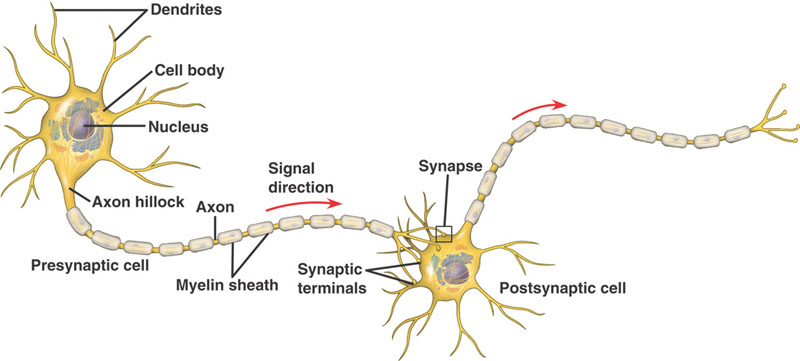

In [1]:
from IPython.display import Image
Image('figures/neuron_structure.jpg', width=900)

* **Synapse:** elementary structural and functional units that control *interaction* between neurons. *Chemical synapse*, most common kind of synapse, converts a pre-synaptic electrical signal into a chemical signal and then back into a post-synaptic electrical signal. Traditional descriptions of assume that a synapse can either impose *excitation* or *inhibition* (but not both) on the receptive neuron.

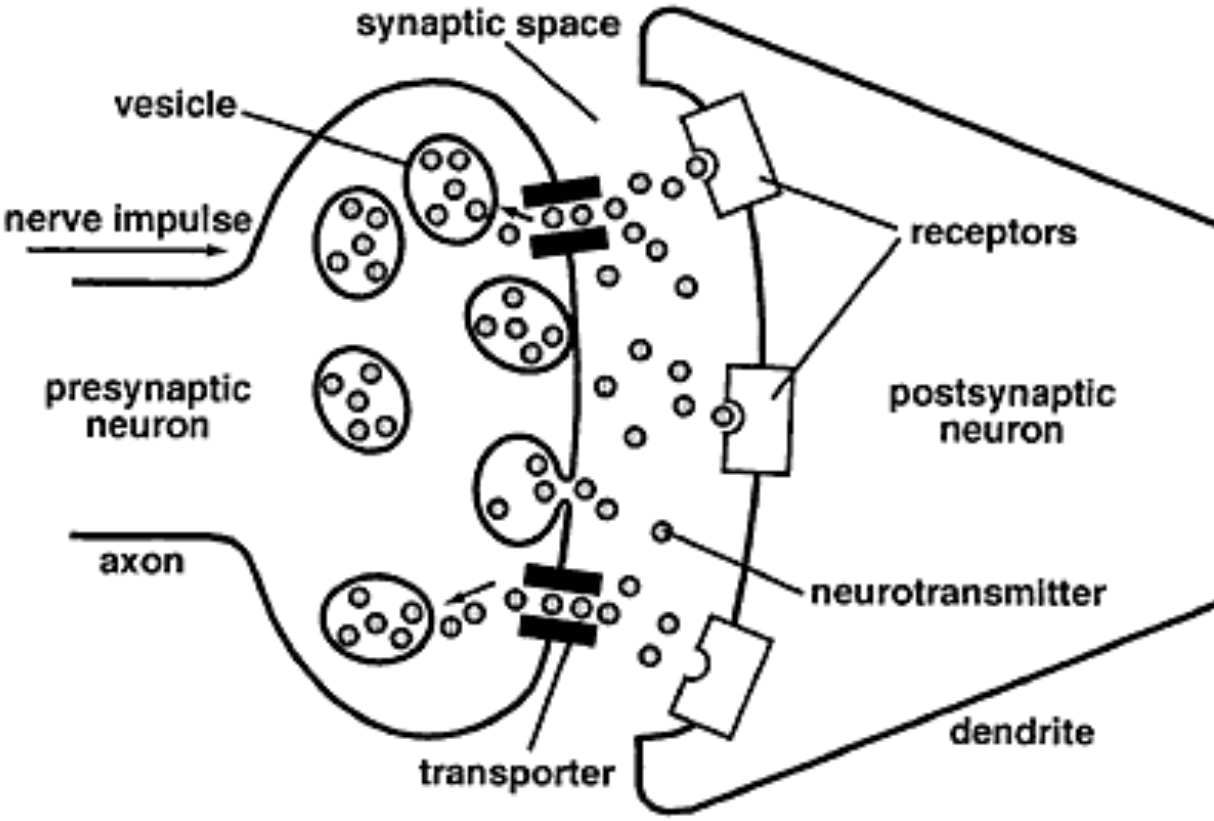

In [2]:
Image('figures/synapse.png', width=500)

McCullock and Pitts described such a nerve cell as a simple logic gate with binary outputs; multiple signals arrive at the dendrites, are then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon.

Only a few years later, Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model (F. Rosenblatt, The Perceptron, a Perceiving and Recognizing Automaton. Cornell Aeronautical Laboratory, 1957). With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a neuron fires or not. In the context of supervised learning and classification, such an algorithm could then be used to predict if a sample belonged to one class or the other.

More formally, we can pose this problem as a binary classification task where we refer to our two classes as 1 (positive class) and -1 (negative class) for simplicity.

A basic model for a neuron consists of the following: 

* A set of *synapses* each of which is characterized by a *weight* (which includes a *bias*).

* An *adder*.

* An *activation function* (e.g. linear function)

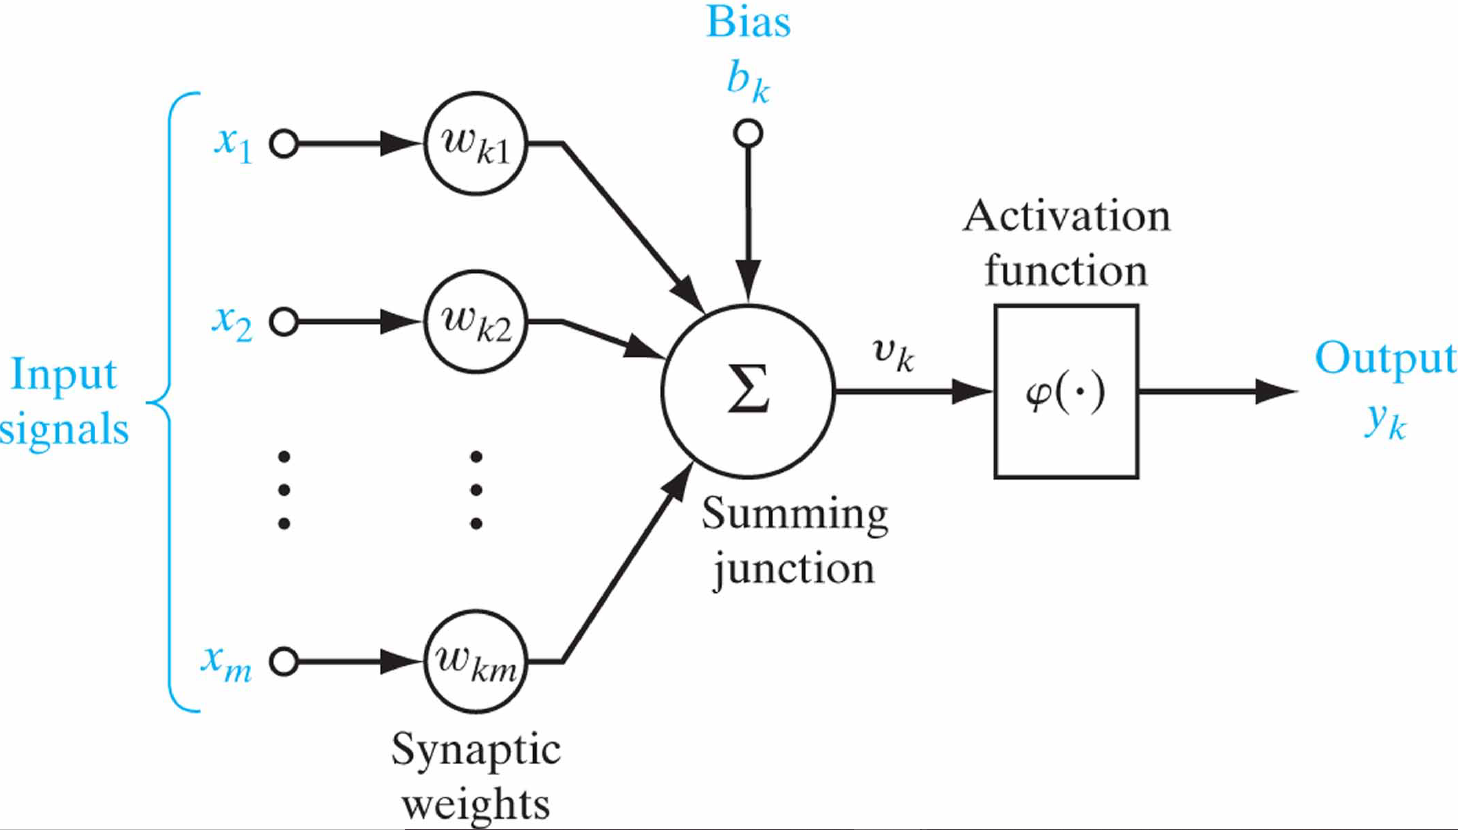

In [3]:
Image('figures/modelneuron.png', width=700)

We can write this mathematically as: 

$$y_k = \varphi\left( \sum_{j=1}^m w_{kj}x_j + b_k\right)$$

where $\varphi(x) = \begin{cases}1, & x\geq 0\\ 0, & x<0\end{cases}$
    
* *What does this look like graphically?*

## In the News/Media

![Brainy Computer 1955](http://blog.modernmechanix.com/mags/PopularMechanics/5-1955/brainy_computer.jpg)
<center> Popular Mechanics 5-1955 </center>

![Rosenblatt Article 1958](https://tripleampersand.org/wp-content/uploads/2020/04/Alexander-L.-Cicchinelli-Collector.-Frank-Rosenblatt-Publications-17-1-3370.-Division-of-Rare-and-Manuscript-Collections-Cornell-University-Library.-782x1024.jpg)

![The Perceptron](https://tripleampersand.org/wp-content/uploads/2020/04/Mark-I-Perceptron-at-the-Cornell-Aeronautical-Laboratory-834x1024.jpg)

![Character Recognition](https://news.cornell.edu/sites/default/files/styles/full_size/public/2019-09/0925_rosenblatt5.jpg?itok=YuOn88nZ)

## The Perceptron Algorithm

Consider an alternative error function known as the *perceptron criterion*. To derive this, we note that we are seeking a weight vector $\mathbf{w}$ such that patterns $x_i$ in class $C_1$ will have $\mathbf{w}^Tx_i + b > 0$, whereas the patterns $x_i$ in class $C_2$ have $\mathbf{w}^Tx_i + b < 0$. Using the $t\in \{-1,1\}$ target coding scheme it follows that we would like all patterns to satisfy

$$(\mathbf{w}^Tx_i + b)t_i > 0$$

* The perceptron criterion associates zero error with any pattern that is correctly classified, whereas for a misclassified pattern $x_i$ it tries to minimize the quantity $-(\mathbf{w}^Tx_i + b)t_i$.

* The perceptron criterion is therefore given by:

$$E_p(\mathbf{w},b) = - \sum_{n\in\mathcal{M}} (\mathbf{w}^T \mathbf{x}_n + b) t_n$$

where $\mathcal{M}$ denotes the set of all misclassified patterns.

* We now apply the *stochastic gradient descent* algorithm to this error function. The change in the weight vector $\mathbf{w}$ is then given by:

\begin{eqnarray}
\mathbf{w}^{(t+1)} &\leftarrow & \mathbf{w}^{(t)} - \eta \frac{\partial E_p(\mathbf{w},b)}{\partial \mathbf{w}} = \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n\\
b^{(t+1)} &\leftarrow & b^{(t)} - \eta\frac{\partial E_p(\mathbf{w},b)}{\partial b} = b^{(t)} + \eta t_n
\end{eqnarray}

where $\eta$ is the **learning rate** parameter and $t$ is an integer that indexes the iteration steps of the algorithm. 

* Note that, as the weight vector evolves during training, the set of patterns that are misclassified will change.

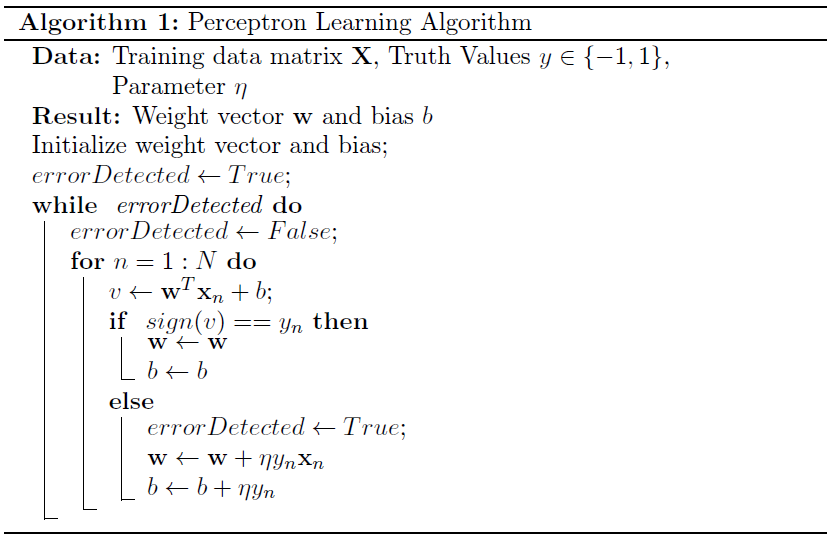

In [4]:
Image('figures/PerceptronLearning.png', width=700)

In [ ]:
def generateMVNRandData(Npts, mu, sigma):
    data  = np.random.multivariate_normal(mu, sigma*np.eye(len(mu)), Npts)
    return data

def plotLine(weights, range):
    x = np.array(range)
    y = -(weights[0]/weights[1])-(weights[2]/weights[1])*x
    plt.plot(y,x)

def perceptronLearningAlg(data,labels,eta,nEpochs):
    nPts = data.shape[0]
    weights = np.random.rand(data.shape[1])
    print('Initial weights:', weights)
    
    error = 1
    epo = 0
    while(error > 0 and epo < nEpochs):
        error = 0
        epo += 1
        for i in range(nPts):
            activation =  data[i,:]@weights
            if np.sign(activation) != labels[i]:
                weights += eta*data[i,:]*labels[i]
                error += 1
                plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)
                plotLine(weights, [-2,2]);
                plt.pause(0.5)
    
    print('Final weights:', weights)
    return weights

In [ ]:
Npts  = 100
mu1   = [2,2]
mu2   = [0,0]
var   = .1
eta   = 0.3
nEpochs = 10;

data1 = np.array(generateMVNRandData(Npts, mu1, var))
data1 = np.hstack((np.ones((Npts,1)),data1))

data2 = np.array(generateMVNRandData(Npts, mu2, var))
data2 = np.hstack((np.ones((Npts,1)),data2))

data  = np.vstack(( data1, data2))
labels= np.hstack((np.ones(Npts), -np.ones(Npts)))

plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)

perceptronLearningAlg(data,labels,eta,nEpochs);

# Perceptron Convergence Theorem

The *Perceptron convergence theorem* states that for any data set which is linearly separable the perceptron learning algorithm is guaranteed to find *a* solution in a finite number of steps.

* In other words, the Perceptron learning rule is guaranteed to converge to a weight vector that correctly classifies the examples provided the training examples are linearly separable.